# 실전 단변량분석 : 종합실습

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. (비즈니스 문제 및 가설)
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings   
warnings.filterwarnings("ignore")  # 향후 버전에서 제외될 수 있다는 경고 메시지 감추기

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

# 행은 지역별 데이터임 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [4]:
data[var].isna().sum()

0

* NAN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [5]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

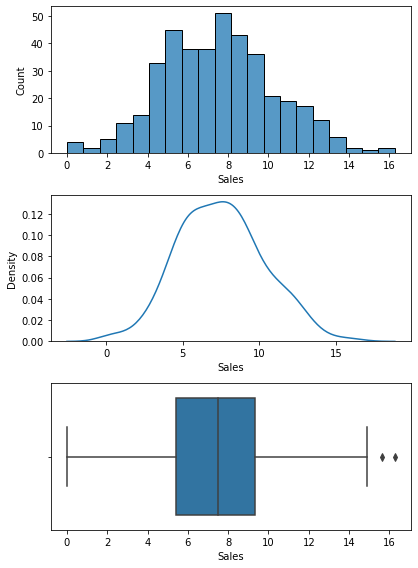

In [6]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

8) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

### ② CompPrice

In [14]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

경쟁사 가격(단위 : 달러)
아마도 경쟁사 가격이 낮을수록 판매량이 높을것으로 파악됨. 

2) 숫자, 범주?

In [15]:
# 숫자형 데이터
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

3) NaN 존재 유무 및 조치방안

In [16]:
data[var].isna().sum()

0

In [17]:
# nan값 없음 

4) 가변수화 필요 여부

In [18]:
# 숫자형 데이터이므로 가변수화 필요 x

5) 기초통계량(수치화)

In [19]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

{'whiskers': [<matplotlib.lines.Line2D at 0x2356d8f4550>,
 'caps': [<matplotlib.lines.Line2D at 0x2356d8f4c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2356d8f41f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2356d8ff310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2356d8ff670>],
 'means': []}

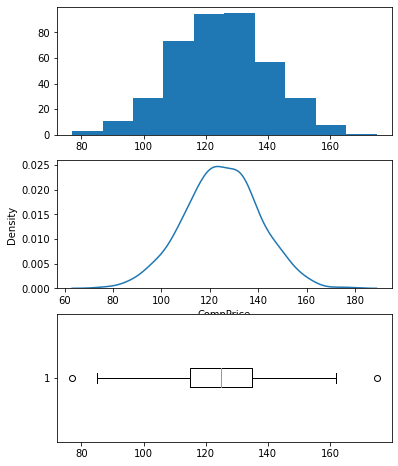

In [20]:
plt.figure(figsize=(6,8))

plt.subplot(3,1,1)
plt.hist(data[var],bins=10)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
plt.boxplot(data[var], vert=False)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
정규 분포에 가까운 형태의 그래프를 보임. 가격이 들쑥날쑥하기보다는 고른 분포로 파악됨. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
경쟁사 가격이 낮을수록 판매량이 높은지 상관관계를 분석할 필요가 있어 보임. 
가격 분포가 고르다보니(지역별 경쟁사 가격에 차이가 별로 없음.) 상관관계가 크지 않을 것으로 예측됨. 

### ③ Income

In [21]:
var = 'Income'

1) 변수의 비즈니스 의미

지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

In [22]:
# 숫자형 데이터

3) NaN 존재 유무 및 조치방안

In [23]:
data[var].isna().sum()

0

In [24]:
# nan값 X

4) 가변수화 필요 여부

In [27]:
# 숫자형이므로 X

5) 기초통계량(수치화)

In [28]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

(array([41., 45., 37., 32., 55., 46., 43., 38., 29., 34.]),
 array([ 21. ,  30.9,  40.8,  50.7,  60.6,  70.5,  80.4,  90.3, 100.2,
        110.1, 120. ]),
 <BarContainer object of 10 artists>)

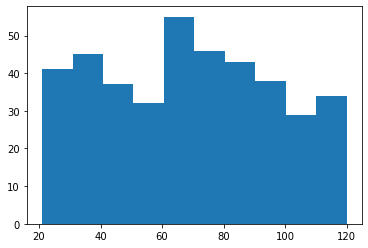

In [29]:
# 분포가 왜이래..? 자연스럽지 않은 원인을 파악해야 
# 자연스러운 그래프는 정규분포형태를 따른다.
# 지역별로 수입 평균이 다른 외부적 이유가 있을 것! 

plt.hist(data[var],bins=10)

<AxesSubplot:xlabel='Income', ylabel='Density'>

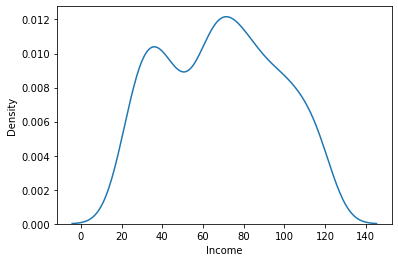

In [30]:
sns.kdeplot(data[var])

{'whiskers': [<matplotlib.lines.Line2D at 0x2356da413a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2356da41a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2356da41040>],
 'medians': [<matplotlib.lines.Line2D at 0x2356da4b160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2356da4b4c0>],
 'means': []}

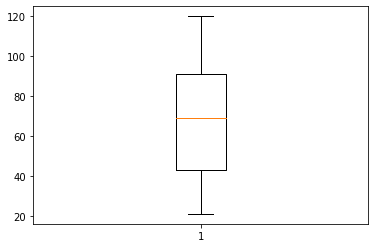

In [31]:
plt.boxplot(data[var])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

지역별로 평균 소득의 편차가 크기때문에 소득별로 자동차 판매량에 유의미한 상관관계가 있을것으로 생각됨. 

8) 추가 분석해 볼 사항이 있나요?

### ④ Advertising

In [23]:
var = 'Advertising'

1) 변수의 비즈니스 의미

In [ ]:
각 지역, 회사의 광고 예산(단위 : 1000달러)
광고 예산이 클수록 판매량이 높은것이 이상적이며 또 얼마나 높은지 파악해야 

2) 숫자, 범주?

In [ ]:
# 숫자 

3) NaN 존재 유무 및 조치방안

In [24]:
data[var].isna().sum()

0

In [ ]:
# 없음

4) 가변수화 필요 여부

In [ ]:
# 없음 

5) 기초통계량(수치화)

In [25]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

(array([161.,  45.,  34.,  57.,  47.,  29.,  18.,   5.,   3.,   1.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

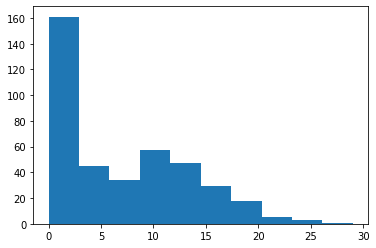

In [27]:
plt.hist(data[var],bins=10)

<AxesSubplot:xlabel='Advertising', ylabel='Density'>

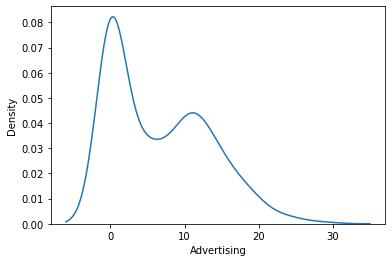

In [28]:
sns.kdeplot(data[var])

{'whiskers': [<matplotlib.lines.Line2D at 0x27d35e26eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d360505b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d35e26b50>],
 'medians': [<matplotlib.lines.Line2D at 0x27d36050c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d36050fd0>],
 'means': []}

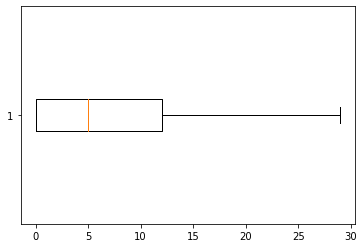

In [29]:
plt.boxplot(data[var],vert=False)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대부분의 지역에 광고비 평균보다 덜씀 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
다른 지역에 비해 광고비가 유난히 큰 몇군데의 지역이 있음. 그만큼의 가치가 있는지, 다른 지역으로 분산하는 방안이
어떨지 파악해야

### ⑤ Population

In [30]:
var = 'Population'

1) 변수의 비즈니스 의미

In [ ]:
지역 인구수(단위 : 1000명)

2) 숫자, 범주?

In [ ]:
# 숫자 

3) NaN 존재 유무 및 조치방안

In [31]:
data[var].isna().sum()

0

In [ ]:
# 없음 

4) 가변수화 필요 여부

In [ ]:
# X

5) 기초통계량(수치화)

In [32]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

(array([41., 39., 39., 35., 32., 46., 45., 39., 38., 46.]),
 array([ 10. ,  59.9, 109.8, 159.7, 209.6, 259.5, 309.4, 359.3, 409.2,
        459.1, 509. ]),
 <BarContainer object of 10 artists>)

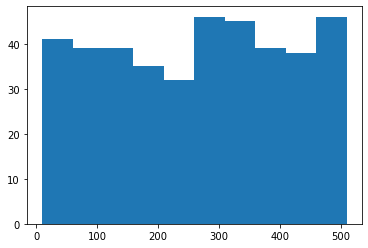

In [33]:
plt.hist(data[var])

<AxesSubplot:xlabel='Population', ylabel='Density'>

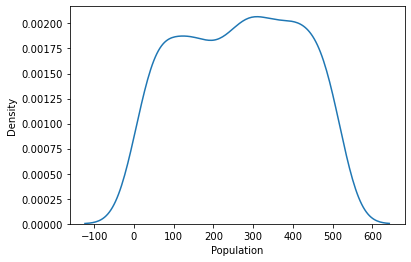

In [35]:
sns.kdeplot(data[var])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

In [36]:
var = 'Price'

1) 변수의 비즈니스 의미

In [ ]:
자사 지역별 판매가격

2) 숫자, 범주?

In [37]:
# 숫자 

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

3) NaN 존재 유무 및 조치방안

In [38]:
data[var].isna().sum()

0

In [ ]:
# X 

4) 가변수화 필요 여부

In [ ]:
# X

5) 기초통계량(수치화)

In [39]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

(array([  1.,   4.,  14.,  36.,  91., 106.,  95.,  37.,  14.,   2.]),
 array([ 24. ,  40.7,  57.4,  74.1,  90.8, 107.5, 124.2, 140.9, 157.6,
        174.3, 191. ]),
 <BarContainer object of 10 artists>)

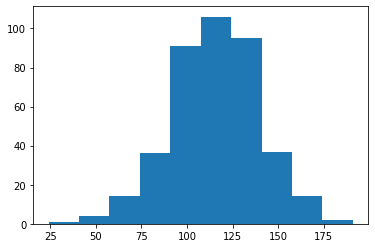

In [40]:
plt.hist(data[var],bins=10)

<AxesSubplot:xlabel='Price', ylabel='Density'>

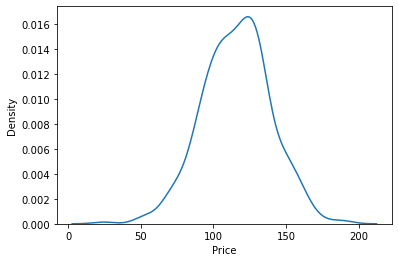

In [41]:
sns.kdeplot(data[var])

{'whiskers': [<matplotlib.lines.Line2D at 0x27d354cf7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d354cfeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d354cf490>],
 'medians': [<matplotlib.lines.Line2D at 0x27d354b5550>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d354b58b0>],
 'means': []}

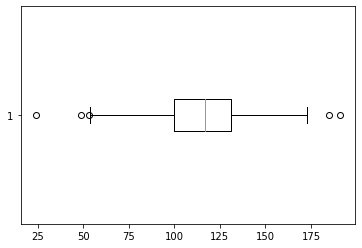

In [43]:
plt.boxplot(data[var],vert=False)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
이상치가 꽤 보임. 

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

In [44]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 숫자, 범주?

* 범주

In [45]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

* 범주 값의 종류 : 'Bad', 'Good', 'Medium'

3) NaN 존재 유무 및 조치방안

In [46]:
data[var].isna().sum()

0

* NA 없음

4) 가변수화 필요 여부

* 범주형이고, 1,0 값이 아니므로 가변수화 필요.

5) 기초통계량(수치화)

In [47]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [48]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

6) 분포 확인(시각화)

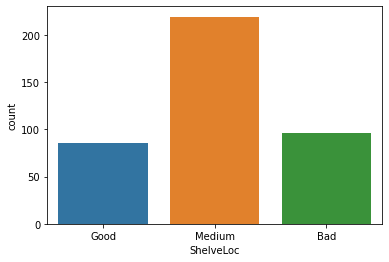

In [49]:
sns.countplot(data[var], order = ['Good','Medium','Bad'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

8) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

### ⑧ Age

In [33]:
var = 'Age'

1) 변수의 비즈니스 의미

In [ ]:
# 지역 인구의 평균 연령
# 구매력이 큰 세대인지 ?

2) 숫자, 범주?

In [ ]:
# 숫자 

3) NaN 존재 유무 및 조치방안

In [35]:
data['Age'].isna().sum()

0

In [ ]:
# 없음 

4) 가변수화 필요 여부

In [ ]:
# 숫자이므로 X

5) 기초통계량(수치화)

In [37]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Age'>

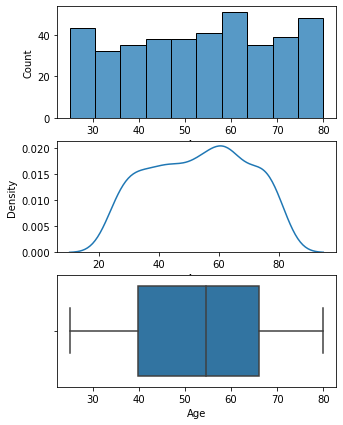

In [49]:
plt.figure(figsize=(5,7))
plt.subplot(3,1,1)
sns.histplot(data[var],bins=10)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
#  고령층 많아보임. --> 젊은 세대가 많은 지역으로 비즈니스 확장 필요 

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [50]:
var = 'Urban'

1) 변수의 비즈니스 의미

In [ ]:
# 도심 지역 여부(Yes,No)

2) 숫자, 범주?

In [ ]:
# 범주 

3) NaN 존재 유무 및 조치방안

In [51]:
data[var].isna().sum()

0

In [ ]:
# 없음 

4) 가변수화 필요 여부

In [ ]:
# 있음. 

5) 기초통계량(수치화)

In [57]:
tmp = data[var].value_counts()
tmp

Yes    282
No     118
Name: Urban, dtype: int64


6) 분포 확인(시각화)

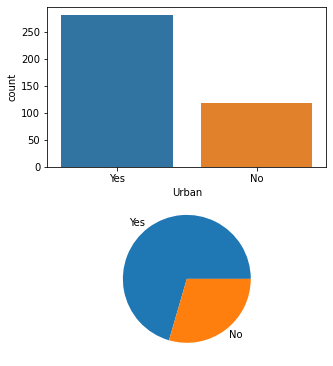

In [62]:
plt.figure(figsize=(5,10))
plt.subplot(3,1,1)
sns.countplot(data[var])

plt.subplot(3,1,2)
plt.pie(tmp.values, labels=tmp.index)

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
# 도시 지역이 많다. 그러나 땅이 넓은 미국에서 시골지역도 카시트 수요가 높지 않을까..? 

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

In [63]:
var = 'US'

1) 변수의 비즈니스 의미

In [65]:
# 매장이 미국에 있는지 여부(Yes,No)

2) 숫자, 범주?

In [66]:
# 범주 

3) NaN 존재 유무 및 조치방안

In [67]:
data[var].isna().sum()

0

In [ ]:
# 없음 

4) 가변수화 필요 여부

In [ ]:
# 필요. 

5) 기초통계량(수치화)

In [71]:
data[var].value_counts()

Yes    258
No     142
Name: US, dtype: int64

6) 분포 확인(시각화)

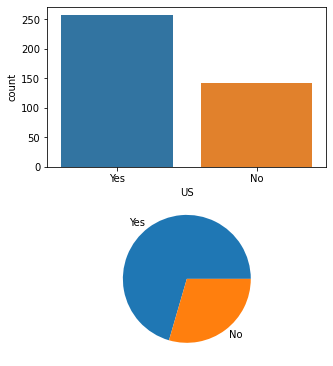

In [72]:
plt.figure(figsize=(5,10))
plt.subplot(3,1,1)
sns.countplot(data[var])

plt.subplot(3,1,2)
plt.pie(tmp.values, labels=tmp.index)

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?